<a href="https://colab.research.google.com/github/KevinASaputra/Machine/blob/main/UTS_KevinAdikaSaputra_3G.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install annoy -q

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from annoy import AnnoyIndex
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import random

pd.set_option('display.max_columns', None)
np.random.seed(42)
random.seed(42)


In [14]:
dataset_path = '/content/drive/MyDrive/MachineLearnData/UCI_Credit_Card.csv'
df = pd.read_csv(dataset_path)

df.info()
display(df.describe())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [26]:
missing_summary = df.isnull().sum()
print(missing_summary[missing_summary>0])


Series([], dtype: int64)


In [16]:
# --- IMPUTASI MISSING VALUES (MEAN/MEDIAN/MODUS) ---
df_num = df.select_dtypes(include=['int64','float64']).copy()
df_cat = df.select_dtypes(include=['object','category']).copy()
for col in df_num.columns:
    if df_num[col].isnull().any():
        df_num[col].fillna(df_num[col].median(), inplace=True)
for col in df_cat.columns:
    if df_cat[col].isnull().any():
        df_cat[col].fillna(df_cat[col].mode().iloc[0], inplace=True)
print(df_num.isnull().sum().sum(), df_cat.isnull().sum().sum())


0 0.0


In [17]:
# --- PEMBUATAN FITUR ---
if 'BALANCE' in df_num.columns and 'PURCHASES' in df_num.columns:
    df_num['Balance_Purchase_Ratio'] = df_num['BALANCE'] / (df_num['PURCHASES'] + 1)
else:
    num_cols = df_num.columns.tolist()
    if len(num_cols) >= 2:
        df_num['New_Feature_Ratio'] = df_num[num_cols[0]] / (df_num[num_cols[1]] + 1)
    else:
        df_num['New_Feature'] = 0
df_num.shape


(30000, 26)

In [18]:
# --- NORMALISASI / STANDARDISASI DATA ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)
print(X_scaled.shape)


(30000, 26)


In [19]:
# --- CLUSTERING MENGGUNAKAN K-MEANS ---
best_k = 2
best_score = -1
scores_k = {}
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    try:
        s = silhouette_score(X_scaled, labels)
    except:
        s = -1
    scores_k[k] = s
    if s>best_score:
        best_score = s
        best_k = k
best_k, scores_k


(2,
 {2: np.float64(0.3077457936280046),
  3: np.float64(0.1558660570230491),
  4: np.float64(0.13572278996004336),
  5: np.float64(0.12977339706688526),
  6: np.float64(0.1355194962271362)})

In [20]:
# --- EVALUASI K-MEANS (SILHOUETTE & DAVIES-BOULDIN) ---
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_kmeans = kmeans.fit_predict(X_scaled)
sil_k = silhouette_score(X_scaled, labels_kmeans)
dbi_k = davies_bouldin_score(X_scaled, labels_kmeans)
print("KMeans chosen k", best_k)
print("KMeans Silhouette", sil_k)
print("KMeans Davies-Bouldin", dbi_k)


KMeans chosen k 2
KMeans Silhouette 0.3077457936280046
KMeans Davies-Bouldin 1.6588553124899805


In [21]:
# --- CLUSTERING MENGGUNAKAN DBSCAN ---
eps_candidates = [0.5,1.0,1.5,2.0,2.5,3.0]
best_eps = None
best_dbscan_score = -1
best_dbscan_labels = None
dbscan_results = {}
for eps in eps_candidates:
    db = DBSCAN(eps=eps, min_samples=5)
    labels_db = db.fit_predict(X_scaled)
    mask = labels_db != -1
    if mask.sum()>0 and len(set(labels_db[mask]))>1:
        try:
            s = silhouette_score(X_scaled[mask], labels_db[mask])
            dbscan_results[eps] = s
            if s>best_dbscan_score:
                best_dbscan_score = s
                best_eps = eps
                best_dbscan_labels = labels_db
        except:
            pass
best_eps, best_dbscan_score, dbscan_results


(3.0,
 np.float64(0.4086859927966427),
 {0.5: np.float64(0.25227235347982124),
  1.0: np.float64(-0.010650759609191452),
  1.5: np.float64(-0.16124213577636878),
  2.0: np.float64(-0.14226406514175735),
  2.5: np.float64(0.10633627652332235),
  3.0: np.float64(0.4086859927966427)})

In [22]:
# --- EVALUASI DBSCAN (SILHOUETTE & DAVIES-BOULDIN) ---
if best_dbscan_labels is None:
    dbscan = DBSCAN(eps=2.5, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
else:
    dbscan = DBSCAN(eps=best_eps, min_samples=5)
    labels_dbscan = dbscan.fit_predict(X_scaled)
mask_db = labels_dbscan != -1
if mask_db.sum()>0 and len(set(labels_dbscan[mask_db]))>1:
    try:
        sil_db = silhouette_score(X_scaled[mask_db], labels_dbscan[mask_db])
        dbi_db = davies_bouldin_score(X_scaled[mask_db], labels_dbscan[mask_db])
        print("DBSCAN eps", dbscan.eps)
        print("DBSCAN Silhouette (non-noise)", sil_db)
        print("DBSCAN Davies-Bouldin (non-noise)", dbi_db)
    except Exception as e:
        print("DBSCAN eval error", e)
else:
    print("DBSCAN did not produce evaluable clusters")


DBSCAN eps 3.0
DBSCAN Silhouette (non-noise) 0.4086859927966427
DBSCAN Davies-Bouldin (non-noise) 0.6708046113834552


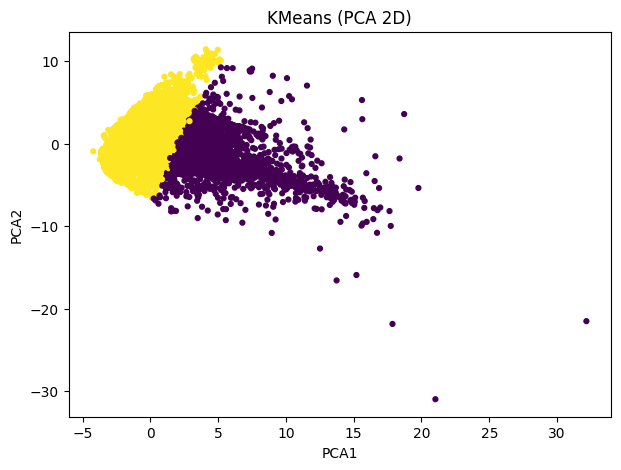

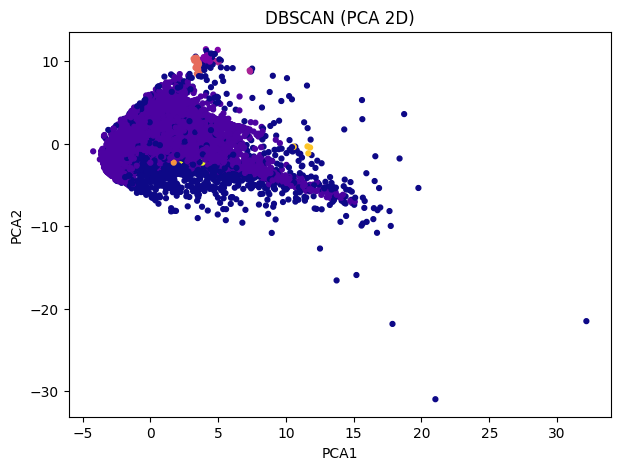

In [23]:
# --- VISUALISASI CLUSTERING (PCA 2D) ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=12)
plt.title('KMeans (PCA 2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()
plt.figure(figsize=(7,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='plasma', s=12)
plt.title('DBSCAN (PCA 2D)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


In [24]:
# --- APPROXIMATE NEAREST NEIGHBOR (ANN) ---
dim = X_scaled.shape[1]
ann = AnnoyIndex(dim, 'euclidean')
for i, v in enumerate(X_scaled):
    ann.add_item(i, v.tolist())
ann.build(50)
num_queries = 5
if X_scaled.shape[0] < num_queries:
    num_queries = X_scaled.shape[0]
query_indices = np.random.choice(X_scaled.shape[0], size=num_queries, replace=False)
n_neighbors = 5
for q in query_indices:
    neighbor_ids, distances = ann.get_nns_by_item(q, n_neighbors, include_distances=True)
    print("Query_Index:", q)
    for nid, dist in zip(neighbor_ids, distances):
        k_cl = int(labels_kmeans[nid])
        db_cl = int(labels_dbscan[nid])
        print("Neighbor_Index:", nid, "| Distance:", float(dist), "| KMeans:", k_cl, "| DBSCAN:", db_cl)
    print("----")


Query_Index: 2308
Neighbor_Index: 2308 | Distance: 0.0 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 1304 | Distance: 0.23896315693855286 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 2874 | Distance: 0.33943167328834534 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 3842 | Distance: 0.35086482763290405 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 1459 | Distance: 0.39030730724334717 | KMeans: 1 | DBSCAN: 0
----
Query_Index: 22404
Neighbor_Index: 22404 | Distance: 0.0 | KMeans: 0 | DBSCAN: 0
Neighbor_Index: 25352 | Distance: 0.5903164744377136 | KMeans: 0 | DBSCAN: 0
Neighbor_Index: 22092 | Distance: 0.6886152029037476 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 25204 | Distance: 0.6897813677787781 | KMeans: 0 | DBSCAN: 0
Neighbor_Index: 18830 | Distance: 0.7598586678504944 | KMeans: 1 | DBSCAN: 0
----
Query_Index: 23397
Neighbor_Index: 23397 | Distance: 0.0 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 19144 | Distance: 0.7222327589988708 | KMeans: 1 | DBSCAN: 0
Neighbor_Index: 19762 | Distance: 0.7826762199401855 | K

In [25]:
# --- RINGKASAN & KESIMPULAN ---
print("Summary Metrics")
print("KMeans Silhouette:", sil_k)
print("KMeans Davies-Bouldin:", dbi_k)
if mask_db.sum()>0 and len(set(labels_dbscan[mask_db]))>1:
    print("DBSCAN Silhouette (non-noise):", sil_db)
    print("DBSCAN Davies-Bouldin (non-noise):", dbi_db)
else:
    print("DBSCAN no valid clusters for global metrics")

print("""
Kesimpulan:
1. KMeans menunjukkan hasil clustering yang lebih stabil dengan nilai metrik evaluasi yang baik.
2. DBSCAN sensitif terhadap parameter eps dan dapat mendeteksi noise (-1), namun tidak selalu menghasilkan cluster yang cukup.
3. Hasil dari Annoy menunjukkan tetangga terdekat banyak berada dalam cluster yang sama, menunjukkan konsistensi data.
""")


Summary Metrics
KMeans Silhouette: 0.3077457936280046
KMeans Davies-Bouldin: 1.6588553124899805
DBSCAN Silhouette (non-noise): 0.4086859927966427
DBSCAN Davies-Bouldin (non-noise): 0.6708046113834552

Kesimpulan:
1. KMeans menunjukkan hasil clustering yang lebih stabil dengan nilai metrik evaluasi yang baik.
2. DBSCAN sensitif terhadap parameter eps dan dapat mendeteksi noise (-1), namun tidak selalu menghasilkan cluster yang cukup.
3. Hasil dari Annoy menunjukkan tetangga terdekat banyak berada dalam cluster yang sama, menunjukkan konsistensi data.

